In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

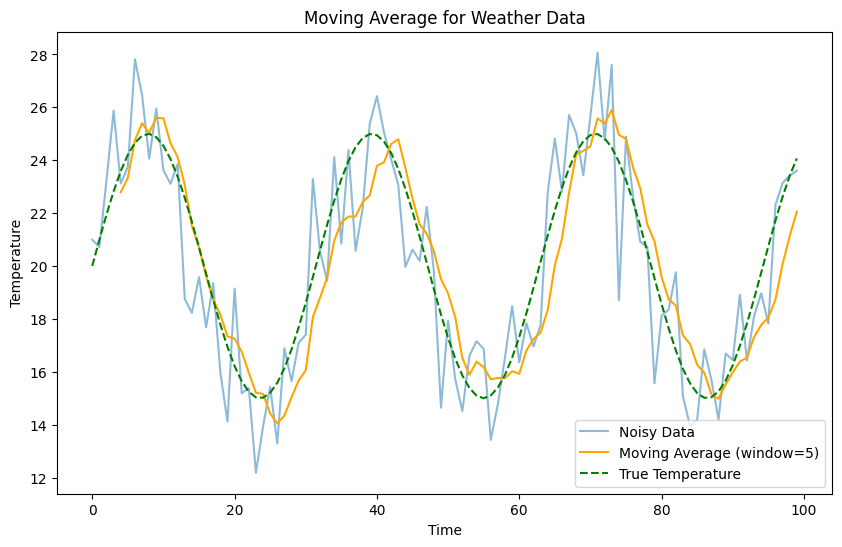

In [6]:
# Moving Average

# Example: Simulated noisy weather data (temperature)
np.random.seed(42)
time = np.arange(0, 100, 1)
true_temperature = 20 + np.sin(0.2 * time) * 5  # True trend with sine wave
noise = np.random.normal(0, 2, len(time))       # Add Gaussian noise
noisy_temperature = true_temperature + noise

# Moving Average function
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Apply Moving Average
window_size = 5
smoothed_temperature_ma = moving_average(noisy_temperature, window_size)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, noisy_temperature, label="Noisy Data", alpha=0.5)
plt.plot(time[window_size - 1:], smoothed_temperature_ma, label=f"Moving Average (window={window_size})", color='orange')
plt.plot(time, true_temperature, label="True Temperature", linestyle='--', color='green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Moving Average for Weather Data")
plt.show()


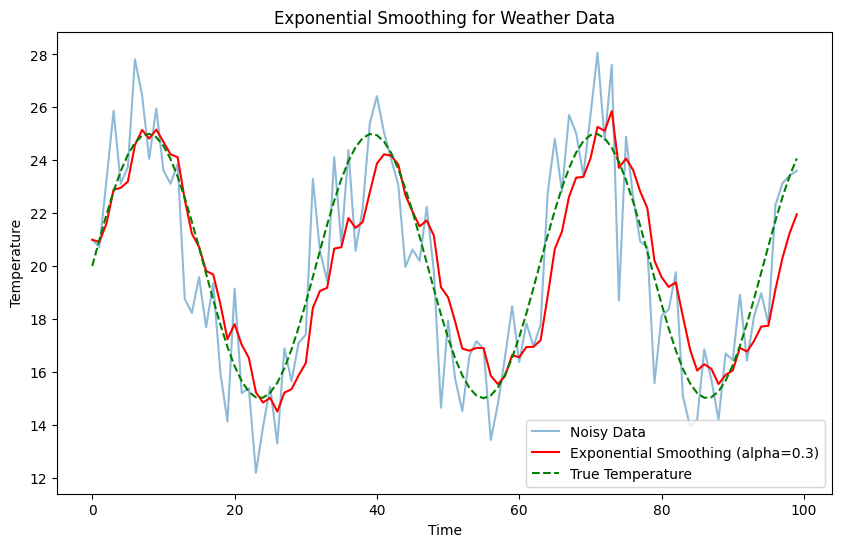

In [7]:
# Exponential Smoothing

# Exponential Smoothing function
def exponential_smoothing(data, alpha):
    smoothed = np.zeros(len(data))
    smoothed[0] = data[0]  # Initialize with the first value
    for t in range(1, len(data)):
        smoothed[t] = alpha * data[t] + (1 - alpha) * smoothed[t - 1]
    return smoothed

# Apply Exponential Smoothing
alpha = 0.3  # Smoothing factor (0 < alpha <= 1)
smoothed_temperature_es = exponential_smoothing(noisy_temperature, alpha)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, noisy_temperature, label="Noisy Data", alpha=0.5)
plt.plot(time, smoothed_temperature_es, label=f"Exponential Smoothing (alpha={alpha})", color='red')
plt.plot(time, true_temperature, label="True Temperature", linestyle='--', color='green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Exponential Smoothing for Weather Data")
plt.show()


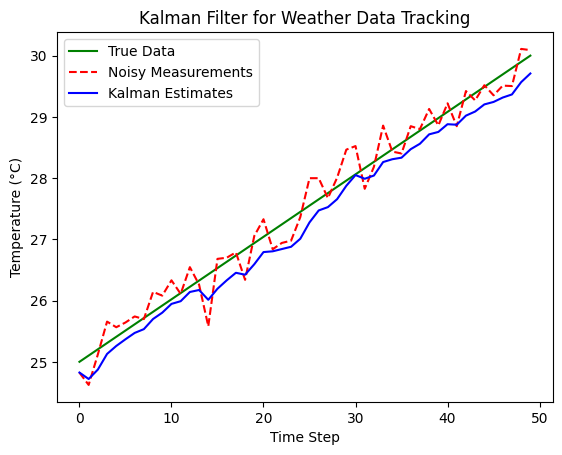

In [5]:
# Kalman Filter

# Initialize Kalman Filter variables
# Initial estimate of state (e.g., initial temperature or humidity)
x_est = 25.0  # Initial state estimate (e.g., 25 degrees Celsius)

# Initial uncertainty (estimate how uncertain we are about the initial state)
P = 10.0  # Variance of the estimate

# Process noise (the model's uncertainty about how the system behaves)
Q = 1e-2  # Small process noise

# Measurement noise (uncertainty in the measurement)
R = 0.1  # Variance of the measurement noise

# Control input (not used in this case, but can be added for more complex models)
u = 0  # No control input (i.e., no external influence)

# Kalman Filter loop
num_steps = 50  # Number of steps (time intervals)
true_data = np.linspace(25, 30, num_steps)  # True values for comparison (e.g., actual temperature)
noisy_measurements = true_data + np.random.normal(0, np.sqrt(R), num_steps)  # Noisy measurements

# Arrays to store the filter estimates
kalman_estimates = []

for z in noisy_measurements:
    # Prediction step (we predict the next state)
    x_pred = x_est + u  # State prediction (simple model)
    P_pred = P + Q  # Predict the uncertainty

    # Update step (we correct the prediction based on the new measurement)
    K = P_pred / (P_pred + R)  # Kalman gain
    x_est = x_pred + K * (z - x_pred)  # Update the estimate
    P = (1 - K) * P_pred  # Update the uncertainty

    kalman_estimates.append(x_est)

# Plot results
plt.plot(true_data, label="True Data", color='green')
plt.plot(noisy_measurements, label="Noisy Measurements", color='red', linestyle='dashed')
plt.plot(kalman_estimates, label="Kalman Estimates", color='blue')
plt.legend()
plt.title("Kalman Filter for Weather Data Tracking")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.show()



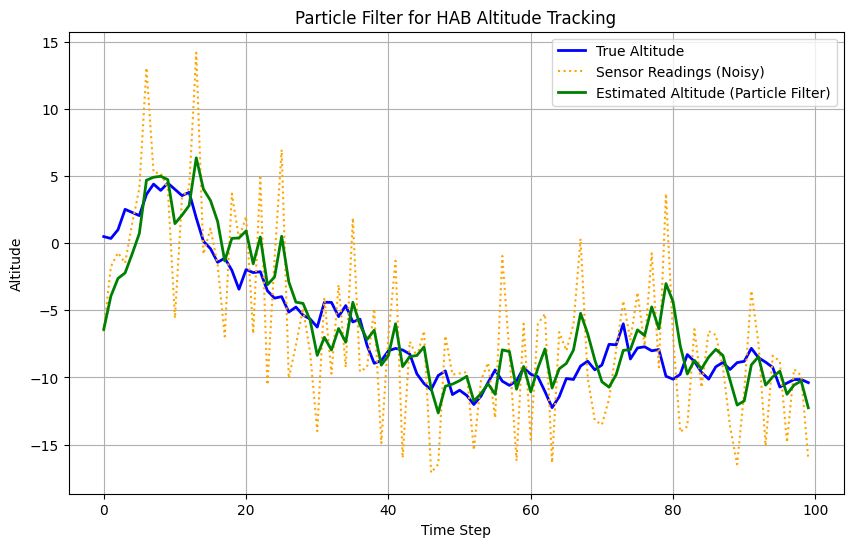

In [2]:
# Particle Filter

# Parameters
NUM_PARTICLES = 1000  # Number of particles
ALTITUDE_NOISE_STD = 5  # Noise in altitude measurements (sensor)
MOTION_MODEL_STD = 2  # Noise in altitude transitions
TIME_STEPS = 100  # Number of time steps for simulation

# Simulated ground truth and sensor readings
np.random.seed(42)  # For reproducibility
true_altitudes = np.cumsum(np.random.normal(0, 1, TIME_STEPS))  # Simulated smooth altitude changes
sensor_readings = true_altitudes + np.random.normal(0, ALTITUDE_NOISE_STD, TIME_STEPS)  # Noisy sensor data

# Particle Filter Initialization
particles = np.random.uniform(low=np.min(sensor_readings) - 10,
                               high=np.max(sensor_readings) + 10,
                               size=NUM_PARTICLES)  # Initialize particles
weights = np.ones(NUM_PARTICLES) / NUM_PARTICLES  # Equal initial weights

# Particle Filter Algorithm
def particle_filter(sensor_readings, particles, weights):
    estimated_altitudes = []

    for t, reading in enumerate(sensor_readings):
        # 1. Predict step: Add motion noise to particles
        particles += np.random.normal(0, MOTION_MODEL_STD, size=NUM_PARTICLES)

        # 2. Update step: Compute weights based on sensor reading likelihood
        weights *= gaussian_likelihood(reading, particles, ALTITUDE_NOISE_STD)
        weights += 1e-300  # Avoid division by zero
        weights /= np.sum(weights)  # Normalize

        # 3. Resample step: Resample particles based on weights
        indices = np.random.choice(range(NUM_PARTICLES), size=NUM_PARTICLES, p=weights)
        particles = particles[indices]
        weights = np.ones(NUM_PARTICLES) / NUM_PARTICLES

        # Estimate the altitude as the weighted average of particles
        estimated_altitudes.append(np.mean(particles))

    return estimated_altitudes

def gaussian_likelihood(measurement, particles, std):
    """Calculate the likelihood of particles given a measurement."""
    return np.exp(-0.5 * ((particles - measurement) / std)**2) / (std * np.sqrt(2 * np.pi))

# Run Particle Filter
estimated_altitudes = particle_filter(sensor_readings, particles, weights)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(true_altitudes, label="True Altitude", linewidth=2, color="blue")
plt.plot(sensor_readings, label="Sensor Readings (Noisy)", linestyle="dotted", color="orange")
plt.plot(estimated_altitudes, label="Estimated Altitude (Particle Filter)", linewidth=2, color="green")
plt.xlabel("Time Step")
plt.ylabel("Altitude")
plt.title("Particle Filter for HAB Altitude Tracking")
plt.legend()
plt.grid()
plt.show()
